In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Activation,Dense,Dropout
from sklearn.metrics import confusion_matrix

In [2]:

data = pd.read_csv("../datasets/customer_churn.csv")

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
data['Churn'] = data['Churn'].map(
                   {'Yes':1 ,'No':0})
  

In [6]:
malecustomer = data[(data['gender'] == "Male")]
malecustomer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,0
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [7]:
DSLInternet = data[(data['InternetService'] == 'DSL')]
DSLInternet

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.1,0
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,0
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0


In [8]:
new_customer = data[(data['gender'] == "Female") & (data['SeniorCitizen'] == 1) & (data['PaymentMethod'] == "Mailed check")]
new_customer

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
139,0390-DCFDQ,Female,1,Yes,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,1
176,2656-FMOKZ,Female,1,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.7,1
267,3197-ARFOY,Female,1,No,No,19,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Mailed check,105.00,2007.25,0
451,5760-WRAHC,Female,1,No,No,22,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,Month-to-month,Yes,Mailed check,69.75,1545.4,0
470,4933-IKULF,Female,1,No,No,17,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,330.6,0
694,2682-KEVRP,Female,1,No,No,22,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,20.05,417,0
747,3966-HRMZA,Female,1,No,No,3,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,75.05,202.9,0
947,9904-EHEVJ,Female,1,Yes,Yes,32,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Mailed check,91.35,2896.55,0
1029,4184-TJFAN,Female,1,Yes,Yes,3,Yes,No,Fiber optic,Yes,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,88.30,273.75,1
1112,2176-LVPNX,Female,1,No,No,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,89.85,6293.45,0


In [9]:
new_customer = data[(data['tenure'] < 10)]

([<matplotlib.patches.Wedge at 0x1b988d74040>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'no'),
  Text(0.7393677515287918, -0.8144540060674139, 'yes')])

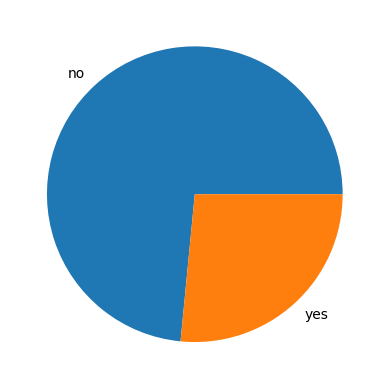

In [10]:
x = data['Churn'].value_counts()
plt.pie(x,labels = ['no','yes'])

In [11]:
import numpy as np
x=np.array(["fiber optic", "dsl","no"])
y =data['InternetService'].value_counts()

<BarContainer object of 3 artists>

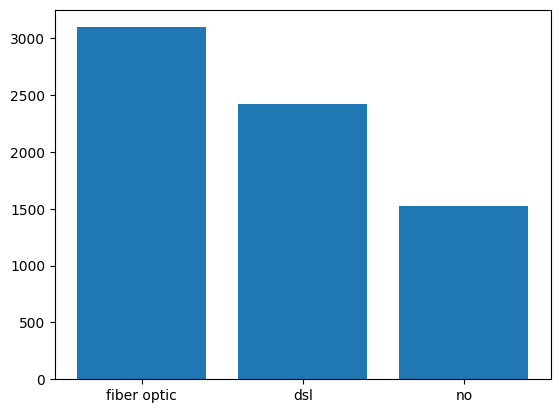

In [12]:
plt.bar(x,y)

In [13]:
y

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [15]:
import pandas as pd
from keras import models
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [16]:
x = data['tenure'].values
y = data.iloc[:,-1:].values
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1,1))

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.33)


In [18]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()
%matplotlib inline
BATCH_SIZE = 10
EPOCHS = 150

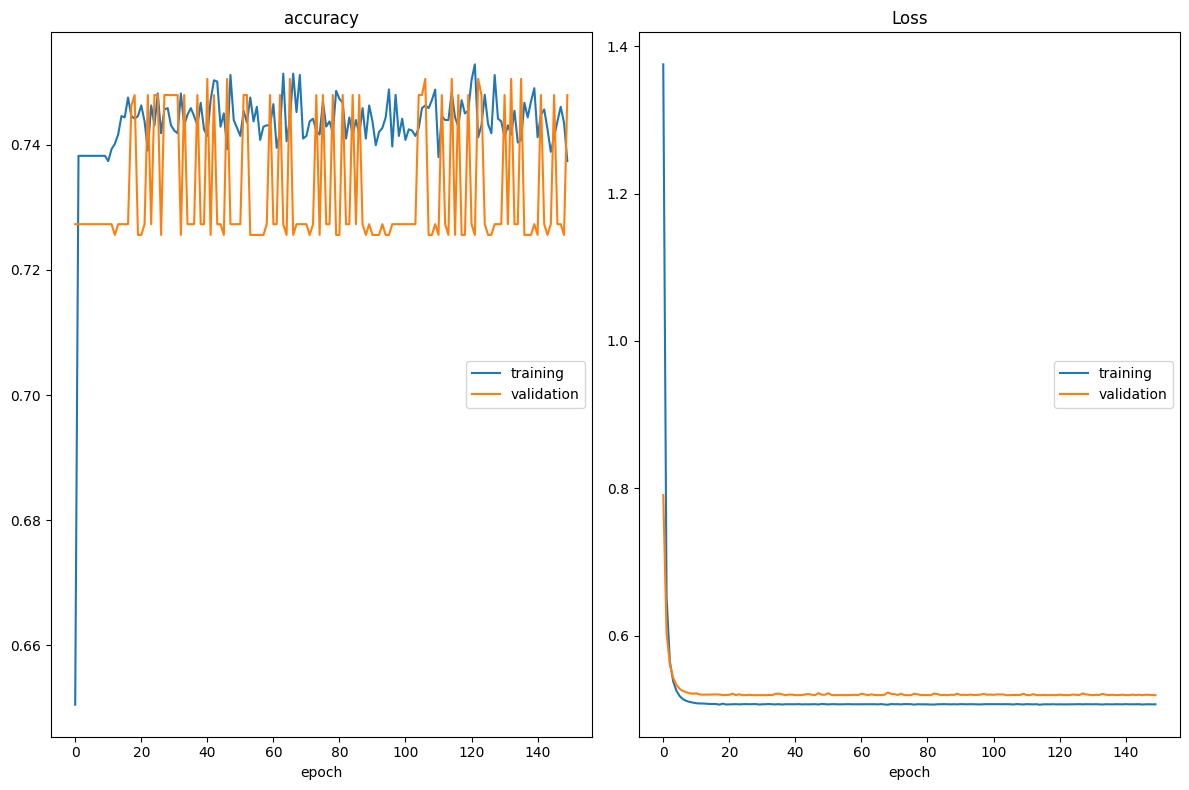

accuracy
	training         	 (min:    0.650, max:    0.753, cur:    0.737)
	validation       	 (min:    0.726, max:    0.751, cur:    0.748)
Loss
	training         	 (min:    0.506, max:    1.375, cur:    0.507)
	validation       	 (min:    0.519, max:    0.791, cur:    0.519)
472/472 [==============================] - 2s 5ms/step - loss: 0.5067 - accuracy: 0.7374 - val_loss: 0.5192 - val_accuracy: 0.7480


In [19]:
model = models.Sequential([
        layers.Dense(12,input_shape=(1,),activation="relu", name="layer1"),
        layers.Dense(8, activation="softmax", name="layer2")])
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics = ['accuracy'])
model.fit(X_train,Y_train,batch_size = BATCH_SIZE,epochs = EPOCHS,callbacks = [plot_losses],verbose = 1,validation_data = (X_test,Y_test))

In [20]:
prediction = model.predict(x=X_test,batch_size = BATCH_SIZE,verbose = 0) 
rounded_pred = np.argmax(prediction,axis=-1)

In [21]:
cm = confusion_matrix(Y_test,rounded_pred)
cm

array([[1609,   82],
       [ 504,  130]], dtype=int64)

In [22]:
#2

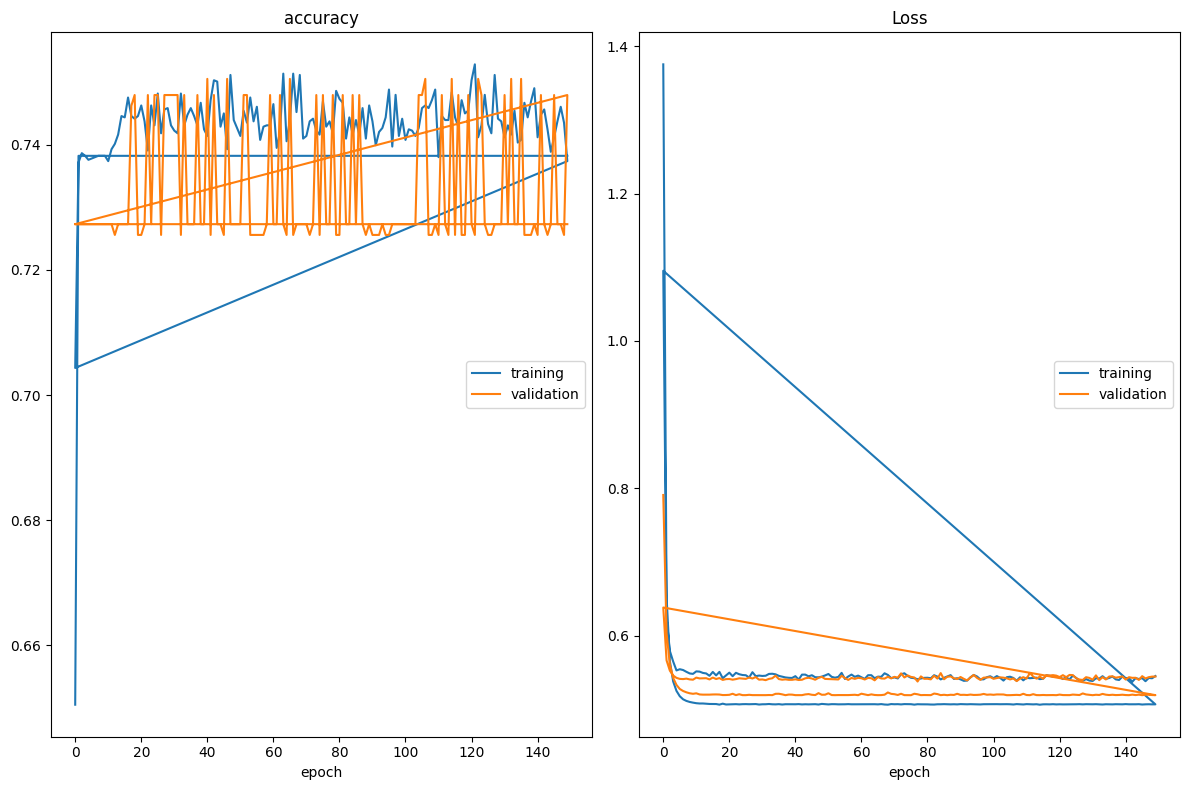

accuracy
	training         	 (min:    0.650, max:    0.753, cur:    0.738)
	validation       	 (min:    0.726, max:    0.751, cur:    0.727)
Loss
	training         	 (min:    0.506, max:    1.375, cur:    0.545)
	validation       	 (min:    0.519, max:    0.791, cur:    0.544)
472/472 [==============================] - 2s 5ms/step - loss: 0.5451 - accuracy: 0.7382 - val_loss: 0.5444 - val_accuracy: 0.7273


In [23]:
model = models.Sequential([
        layers.Dropout(0.3),
        layers.Dense(12,input_shape=(1,),activation="relu", name="layer1"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="softmax", name="layer2")])
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics = ['accuracy'])
model.fit(X_train,Y_train,batch_size = BATCH_SIZE,epochs = EPOCHS,callbacks = [plot_losses],verbose = 1,validation_data = (X_test,Y_test))

In [24]:
prediction = model.predict(x=X_test,batch_size = BATCH_SIZE,verbose = 0) 
rounded_pred = np.argmax(prediction,axis=-1)
cm = confusion_matrix(Y_test,rounded_pred)
cm

array([[1691,    0],
       [ 634,    0]], dtype=int64)

In [25]:
#3

In [26]:
x = data[['tenure','MonthlyCharges']].values
y = data.iloc[:,-1:].values
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x.reshape(-1,1))
y = scaler.fit_transform(y.reshape(-1,1))

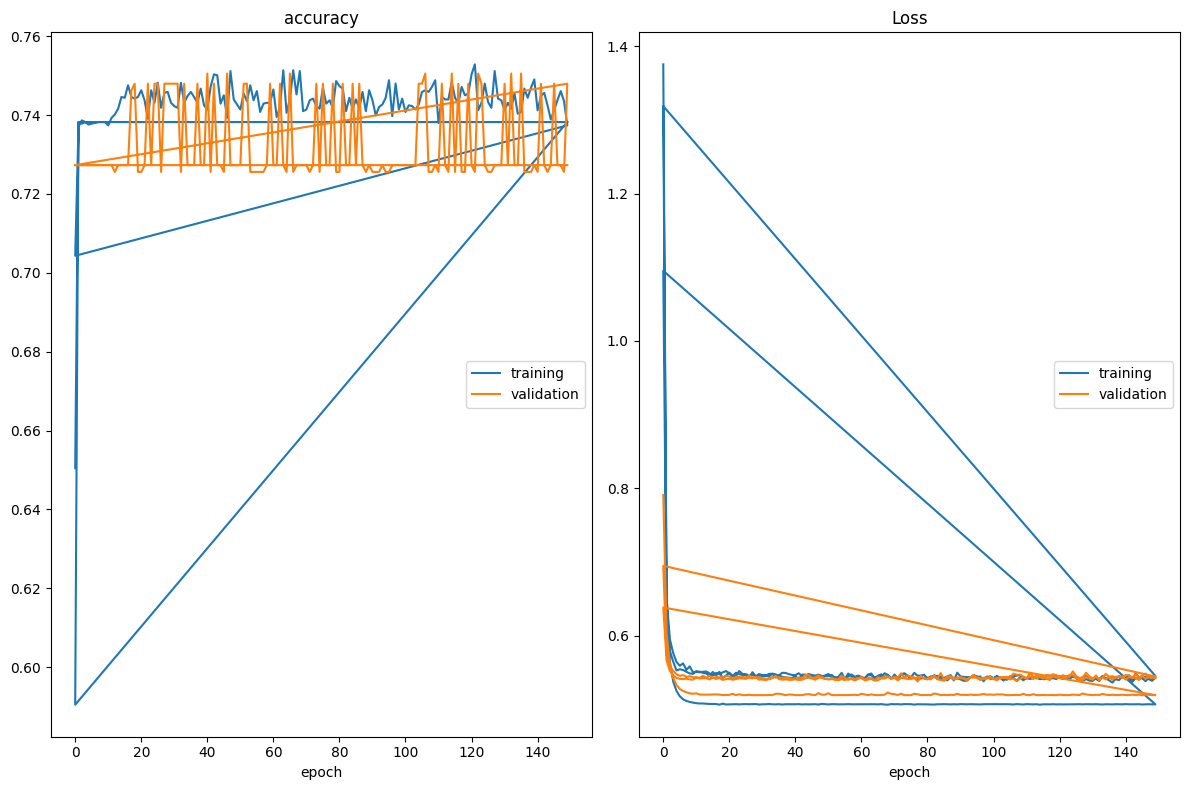

accuracy
	training         	 (min:    0.591, max:    0.753, cur:    0.738)
	validation       	 (min:    0.726, max:    0.751, cur:    0.727)
Loss
	training         	 (min:    0.506, max:    1.375, cur:    0.543)
	validation       	 (min:    0.519, max:    0.791, cur:    0.543)
472/472 [==============================] - 2s 4ms/step - loss: 0.5428 - accuracy: 0.7382 - val_loss: 0.5427 - val_accuracy: 0.7273


In [27]:
model = models.Sequential([
        layers.Dropout(0.3),
        layers.Dense(12,input_shape=(1,),activation="relu", name="layer1"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="softmax", name="layer2")])
model.compile(optimizer="adam",loss="SparseCategoricalCrossentropy",metrics = ['accuracy'])
model.fit(X_train,Y_train,batch_size = BATCH_SIZE,epochs = EPOCHS,callbacks = [plot_losses],verbose = 1,validation_data = (X_test,Y_test))

In [28]:
prediction = model.predict(x=X_test,batch_size = BATCH_SIZE,verbose = 0) 
rounded_pred = np.argmax(prediction,axis=-1)
cm = confusion_matrix(Y_test,rounded_pred)
cm

array([[1691,    0],
       [ 634,    0]], dtype=int64)